# **Facial Emotion Recogniton**


Facial expressions recognition system has received significant attention among researchers in recent decades mainly because of it is diversified applications, such as human computer interactions, multimedia, surveillance, treatment of mentally retarded patients, and lie detection.

The study of Mehrabian  stated that to understand emotion or intention of a person, 55% of the information are conveyed through facial expressions alone, 38% through vocal cues, and the remaining 7% via verbal cues.

This encourages the researchers to explore deeply in the area of facial expressions recognition and analysis (FERA). Ekman et al. asserted after extensive study over facial expressions, that facial expressions are universal and innate.
They also concluded that six basic expressions, namely, happiness, sadness, disgust, anger, surprise, and fear are universal in nature.

##Import Libraries

In [83]:
!pip install py-feat
!pip install opencv-python-headless

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 54.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.1/33.1 MB 29.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 42.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 381.4/381.4 kB 21.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 80.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 76.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 833.3/833.3 kB 23.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 54.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 80.6 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
  Attempting uninstall: numexpr
    Found existing installation: numexpr 2.10.1
    Uninstalling numexpr-2.10.1:
      Successfully uninstal

In [ ]:
!pip install --upgrade torchvision torchaudio

In [41]:
import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Convolution2D, Activation, BatchNormalization, MaxPooling2D, Dropout, Dense, Flatten, AveragePooling2D
from tensorflow.keras.initializers import RandomNormal

from keras.models import Sequential , load_model
from keras.layers import Convolution2D, Activation, BatchNormalization, MaxPooling2D, Dropout, Dense, Flatten, AveragePooling2D
from keras.initializers import  RandomNormal
from keras.layers import Conv2D,MaxPooling2D
from keras.optimizers import RMSprop,SGD,Adam
from keras.callbacks import ModelCheckpoint, TensorBoard ,EarlyStopping, ReduceLROnPlateau
from sklearn.svm import SVC
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt


##Import Dataset

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# import os
# import zipfile

# # Path to the directory containing the zip files
# zip_dir = '/content/drive/MyDrive/Colab Notebooks/Shared 15 with main/SEM 7/PJT 1 '

# # Iterate through the directory and unzip all zip files
# for filename in os.listdir(zip_dir):
#   if filename.endswith(".zip"):
#     zip_path = os.path.join(zip_dir, filename)
#     with zipfile.ZipFile(zip_path, 'r') as zip_ref:
#       zip_ref.extractall(zip_dir)
#     print(f"Unzipped: {filename}")

In [ ]:
data_dir = "/content/drive/MyDrive/Colab Notebooks/Shared 15 with main/SEM 7/PJT 1 "
datagen = ImageDataGenerator()
generator = datagen.flow_from_directory(    data_dir,
                                              target_size=(48,48),
                                              color_mode="grayscale",
                                              subset="training",
                                              class_mode='categorical')

### Pre - Process The Images

In [49]:
from feat.detector import Detector

help(Detector)

Help on class Detector in module feat.detector:

class Detector(builtins.object)
 |  Detector(face_model='retinaface', landmark_model='mobilefacenet', au_model='xgb', emotion_model='resmasknet', facepose_model='img2pose', identity_model='facenet', device='cpu', n_jobs=1, verbose=False, **kwargs)
 |  
 |  Methods defined here:
 |  
 |  __getitem__(self, i)
 |  
 |  __init__(self, face_model='retinaface', landmark_model='mobilefacenet', au_model='xgb', emotion_model='resmasknet', facepose_model='img2pose', identity_model='facenet', device='cpu', n_jobs=1, verbose=False, **kwargs)
 |      Detector class to detect FEX from images or videos.
 |      
 |      Detector is a class used to detect faces, facial landmarks, emotions, and action units from images and videos.
 |      
 |      Args:
 |          n_jobs (int, default=1): Number of processes to use for extraction.
 |          device (str): specify device to process data (default='cpu'), can be
 |          ['auto', 'cpu', 'cuda', 'mps']


/usr/local/lib/python3.10/dist-packages/kornia/feature/lightglue.py:44: FutureWarning: `torch.cuda.amp.custom_fwd(args...)` is deprecated. Please use `torch.amp.custom_fwd(args..., device_type='cuda')` instead.
  @torch.cuda.amp.custom_fwd(cast_inputs=torch.float32)
100%|██████████| 1.79M/1.79M [00:00<00:00, 21.6MB/s]
100%|██████████| 12.3M/12.3M [00:11<00:00, 1.06MB/s]
100%|██████████| 966k/966k [00:00<00:00, 14.1MB/s]
100%|██████████| 33.6M/33.6M [00:23<00:00, 1.43MB/s]
100%|██████████| 130k/130k [00:00<00:00, 5.36MB/s]
100%|██████████| 45.9M/45.9M [00:35<00:00, 1.30MB/s]
100%|██████████| 130k/130k [00:00<00:00, 4.39MB/s]
100%|██████████| 53.9M/53.9M [01:00<00:00, 893kB/s]
100%|██████████| 130k/130k [00:00<00:00, 3.61MB/s]
100%|██████████| 167k/167k [00:00<00:00, 4.51MB/s]
100%|██████████| 531k/531k [00:00<00:00, 9.56MB/s]
100%|██████████| 494k/494k [00:00<00:00, 1.69MB/s]
100%|██████████| 207k/207k [00:00<00:00, 4.76MB/s]
100%|██████████| 1.15M/1.15M [00:00<00:00, 15.9MB/s]
100%|███

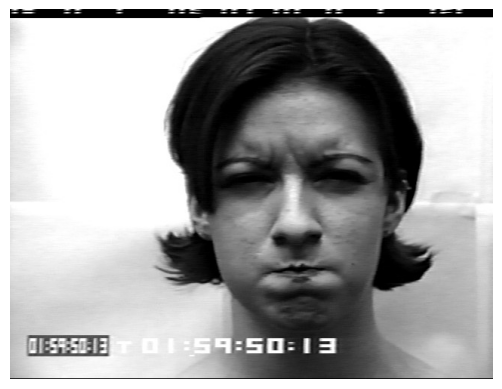

100%|██████████| 1/1 [00:08<00:00,  8.20s/it]


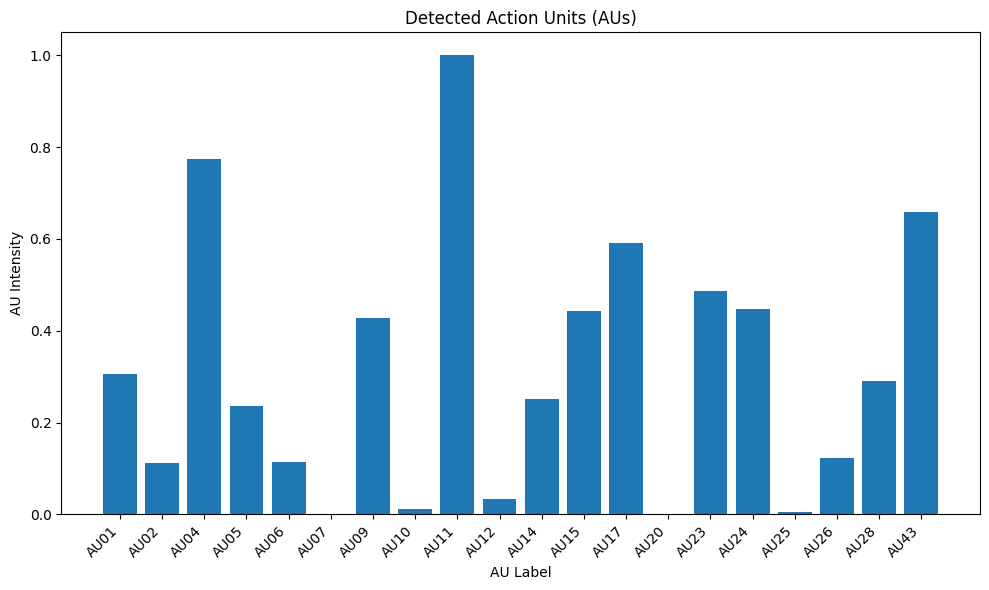

In [1]:
from feat import Detector
import cv2
import matplotlib.pyplot as plt

detector = Detector(au_model='xgb')

image_path = '/content/drive/MyDrive/Colab Notebooks/Shared 15 with main/SEM 7/PJT 1 /anger/S010_004_00000019.png'
image = cv2.imread(image_path)

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image_rgb)
plt.axis('off')
plt.show()


result = detector.detect_image(image_path)

aus_data = result.aus.iloc[0]

au_labels = aus_data.index
au_values = aus_data.values

plt.figure(figsize=(10, 6))
plt.bar(au_labels, au_values)
plt.title('Detected Action Units (AUs)')
plt.xlabel('AU Label')
plt.ylabel('AU Intensity')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Load the Image
Load your image using OpenCV (or any other library) for visualization and processing. For this example, let's assume you have an image named face_image.jpg.

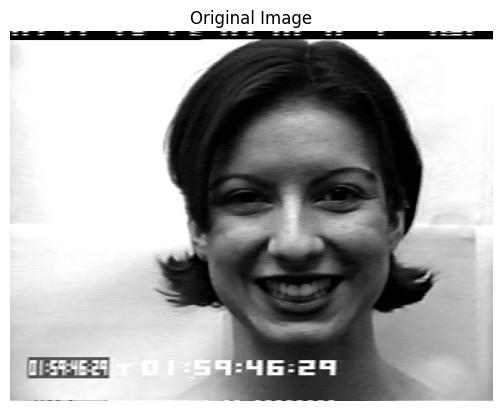

In [17]:
from feat import Fex
from feat import Detector
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

image_path = "/content/drive/MyDrive/Colab Notebooks/Shared 15 with main/SEM 7/PJT 1 /happiness/S010_006_00000015.png"
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image_rgb)
plt.axis("off")
plt.title("Original Image")
plt.show()

### Initialize the py-feat Detector
The Detector class in py-feat provides pre-trained models for extracting AUs and other facial attributes.

In [19]:
detector = Detector()

/usr/local/lib/python3.10/dist-packages/feat/face_detectors/Retinaface/Retinaface_test.py:70: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  pretrained_dict = torch.load(
/us

### Extract AUs from the Image
Use the detect_image method on the Detector to extract AUs from the image.

In [20]:
results = detector.detect_image(image_path)
print(results)

100%|██████████| 1/1 [00:07<00:00,  7.28s/it]


    FaceRectX  FaceRectY  FaceRectWidth  FaceRectHeight  FaceScore  \
0  249.611787  92.715177     260.082729      336.462964   0.999799   

          x_0         x_1         x_2         x_3         x_4  ...  \
0  252.550246  253.873156  257.196233  264.358964  279.218316  ...   

   Identity_505  Identity_506  Identity_507  Identity_508  Identity_509  \
0      -0.03535     -0.006768      0.007255     -0.065137      -0.04202   

   Identity_510  Identity_511  Identity_512  \
0      0.016652      -0.04152      0.019833   

                                               input  frame  
0  /content/drive/MyDrive/Colab Notebooks/Shared ...      0  

[1 rows x 686 columns]


In [23]:
results.columns

Index(['FaceRectX', 'FaceRectY', 'FaceRectWidth', 'FaceRectHeight',
       'FaceScore', 'x_0', 'x_1', 'x_2', 'x_3', 'x_4',
       ...
       'Identity_505', 'Identity_506', 'Identity_507', 'Identity_508',
       'Identity_509', 'Identity_510', 'Identity_511', 'Identity_512', 'input',
       'frame'],
      dtype='object', length=686)

### View Extracted Action Units (AUs)
The results object now contains extracted AUs and other features. You can visualize these AUs by converting them to a DataFrame and plotting them.

In [24]:
aus = results.aus
print(aus)

      AU01     AU02      AU04      AU05      AU06  AU07      AU09      AU10  \
0  0.28013  0.17168  0.179969  0.251102  0.898776   1.0  0.455161  0.779167   

   AU11      AU12      AU14      AU15      AU17  AU20      AU23      AU24  \
0   1.0  0.966566  0.583662  0.338505  0.138821   1.0  0.074952  0.098609   

     AU25      AU26      AU28      AU43  
0  0.9999  0.600634  0.026196  0.065242  


### Plot Action Units
You can create a bar plot or heatmap to visualize the intensities of the extracted AUs.

<ipython-input-25-13c2e5230754>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=aus.columns, y=aus.iloc[0], palette="coolwarm")


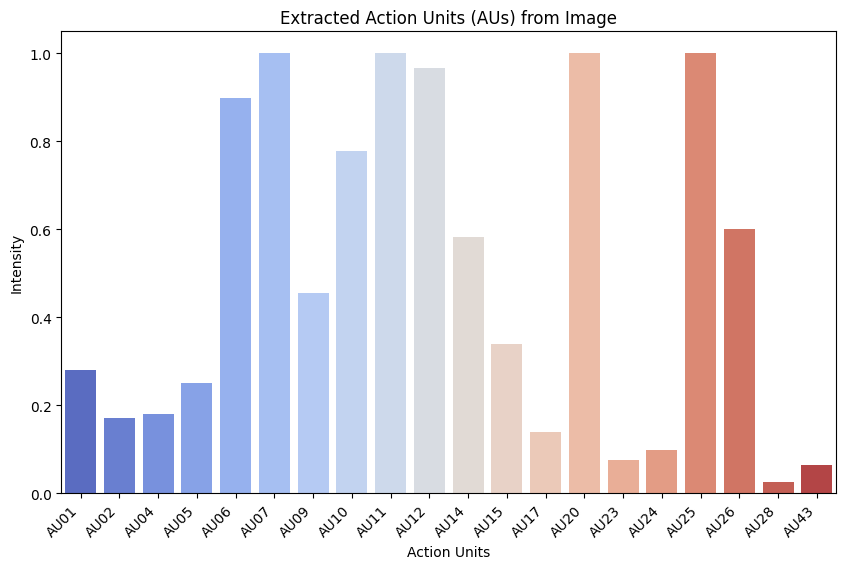

In [25]:
plt.figure(figsize=(10, 6))
sns.barplot(x=aus.columns, y=aus.iloc[0], palette="coolwarm")
plt.title("Extracted Action Units (AUs) from Image")
plt.xticks(rotation=45, ha="right")
plt.ylabel("Intensity")
plt.xlabel("Action Units")
plt.show()

### Display Emotions
If you’re also interested in the emotions predicted by py-feat, you can visualize these alongside the AUs.

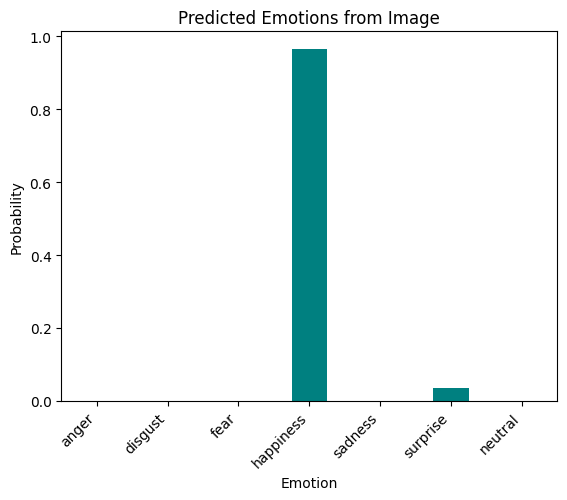

In [27]:
emotions = results.emotions.iloc[0]
emotions.plot(kind="bar", color="teal")
plt.title("Predicted Emotions from Image")
plt.ylabel("Probability")
plt.xlabel("Emotion")
plt.xticks(rotation=45, ha="right")
plt.show()

## Extract the AU's for all the images

In [16]:
# import pandas as pd
# import os
# import cv2
# from feat import Detector
# import matplotlib.pyplot as plt

# def create_dataframe(data_dir):
#   rows = []
#   detector = Detector(au_model='xgb')

#   for class_name in os.listdir(data_dir):
#       class_dir = os.path.join(data_dir, class_name)
#       if os.path.isdir(class_dir):
#           for filename in os.listdir(class_dir):
#               if filename.endswith(('.png', '.jpg', '.jpeg')):
#                   image_path = os.path.join(class_dir, filename)

#                   try:
#                       result = detector.detect_image(image_path)
#                       aus_data = result.aus.iloc[0]
#                       row = {'image_path': image_path, 'emotion_class': class_name}
#                       for au_label, au_value in aus_data.items():
#                           row[au_label] = au_value
#                       rows.append(row)
#                   except Exception as e:
#                       print(f"Error processing {image_path}: {e}")
#   df = pd.DataFrame(rows)
#   return df


# data_dir = "/content/drive/MyDrive/Colab Notebooks/Shared 15 with main/SEM 7/PJT 1 "
# df = create_dataframe(data_dir)
# print(df.head())

In [ ]:
# csv_file_path = '/content/drive/MyDrive/Colab Notebooks/Shared 15 with main/SEM 7/ck+AU.csv'
# df.to_csv(csv_file_path, index=False)

## AU's Dataset

In [30]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Capstone Project/ck+AU.csv')

### Dataset Pre Processing

In [31]:
data['emotion_class'] = data['emotion_class'].replace('newtral', 'neutral')

In [32]:
data

,image_path,emotion_class,AU01,AU02,AU04,AU05,AU06,AU07,AU09,AU10,...,AU14,AU15,AU17,AU20,AU23,AU24,AU25,AU26,AU28,AU43
0,/content/drive/MyDrive/Colab Notebooks/Shared ...,anger,0.305341,0.111024,0.774244,0.235994,0.114007,0.0,0.427204,0.011345,...,0.252306,0.443434,0.591958,0.0,0.486583,0.447435,0.005062,0.123228,0.290482,0.658306
1,/content/drive/MyDrive/Colab Notebooks/Shared ...,anger,0.410413,0.049372,0.567212,0.263178,0.070896,0.0,0.200582,0.000050,...,0.243349,0.155853,0.601341,0.0,0.482076,0.350582,0.002979,0.021886,0.756728,0.149469
2,/content/drive/MyDrive/Colab Notebooks/Shared ...,anger,0.495457,0.126502,0.639733,0.226856,0.148076,0.0,0.572054,0.021714,...,0.449422,0.482744,0.610026,0.0,0.615954,0.429906,0.001003,0.078458,0.208640,0.149787
3,/content/drive/MyDrive/Colab Notebooks/Shared ...,anger,0.367992,0.069756,0.186828,0.327858,0.093801,0.0,0.162881,0.001404,...,0.212178,0.760874,0.634899,0.0,0.579455,0.427951,0.062809,0.111795,0.427864,0.020686
4,/content/drive/MyDrive/Colab Notebooks/Shared ...,anger,0.352316,0.208684,0.855927,0.275487,0.222181,0.0,0.642084,0.026703,...,0.281772,0.256666,0.614216,0.0,0.329869,0.586029,0.005813,0.051902,0.136744,0.153439
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
388,/content/drive/MyDrive/Colab Notebooks/Shared ...,neutral,0.225302,0.244933,0.081000,0.318644,0.127745,0.0,0.124225,0.003299,...,0.114912,0.124776,0.320067,0.0,0.257766,0.307838,0.166607,0.066789,0.040286,0.048816
389,/content/drive/MyDrive/Colab Notebooks/Shared ...,neutral,0.271004,0.122386,0.135678,0.347571,0.166843,0.0,0.129874,0.003849,...,0.108141,0.205502,0.317284,0.0,0.309154,0.208997,0.201857,0.107756,0.075074,0.048068
390,/content/drive/MyDrive/Colab Notebooks/Shared ...,neutral,0.183183,0.107340,0.153325,0.315734,0.144561,0.0,0.124810,0.001073,...,0.136684,0.109674,0.444846,0.0,0.376766,0.248119,0.145572,0.086918,0.023285,0.038345
391,/content/drive/MyDrive/Colab Notebooks/Shared ...,neutral,0.235248,0.157013,0.261249,0.339881,0.168045,0.0,0.126665,0.002646,...,0.160595,0.050449,0.417870,0.0,0.310338,0.357068,0.081102,0.170520,0.064692,0.048056


In [33]:
data['emotion_class'].unique()

array(['anger', 'contempt', 'disgust', 'fear', 'happiness', 'sadness',
       'surprise', 'neutral'], dtype=object)

In [34]:
data.describe()

,AU01,AU02,AU04,AU05,AU06,AU07,AU09,AU10,AU11,AU12,AU14,AU15,AU17,AU20,AU23,AU24,AU25,AU26,AU28,AU43
count,393.000000,393.000000,393.000000,393.000000,393.000000,393.000000,393.000000,393.000000,393.000000,393.000000,393.000000,393.000000,393.000000,393.000000,393.000000,393.000000,393.000000,393.000000,393.000000,393.000000
mean,0.475713,0.298907,0.374992,0.394008,0.388405,0.333333,0.305837,0.231342,0.498728,0.337682,0.382598,0.338150,0.455035,0.435115,0.332925,0.286541,0.550197,0.370722,0.158453,0.185332
std,0.221700,0.215167,0.274089,0.163547,0.306424,0.472005,0.215495,0.330680,0.500636,0.361741,0.255296,0.207795,0.159653,0.496404,0.148188,0.241424,0.445823,0.310181,0.155885,0.225435
min,0.142232,0.045115,0.034763,0.205045,0.056081,0.000000,0.072200,0.000050,0.000000,0.011760,0.044774,0.020721,0.124127,0.000000,0.058417,0.004934,0.000382,0.021886,0.003435,0.012862
25%,0.299077,0.133512,0.149638,0.255365,0.148794,0.000000,0.129874,0.004978,0.000000,0.052479,0.156868,0.171339,0.313230,0.000000,0.220335,0.029868,0.045429,0.111236,0.045899,0.038345
50%,0.421869,0.232451,0.278704,0.339881,0.241401,0.000000,0.203485,0.041824,0.000000,0.148698,0.291349,0.291692,0.478728,0.000000,0.307654,0.266593,0.642664,0.227792,0.101007,0.083097
75%,0.639267,0.398451,0.551263,0.511930,0.586810,1.000000,0.467869,0.364032,1.000000,0.586494,0.611708,0.474064,0.588354,1.000000,0.441891,0.481251,0.999735,0.668518,0.223049,0.219020
max,0.943540,0.886387,0.974760,0.773143,0.956136,1.000000,0.835468,0.996910,1.000000,0.991688,0.909408,0.895304,0.806457,1.000000,0.751106,0.846946,0.999995,0.973897,0.840946,0.926194


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 393 entries, 0 to 392
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   image_path     393 non-null    object 
 1   emotion_class  393 non-null    object 
 2   AU01           393 non-null    float64
 3   AU02           393 non-null    float64
 4   AU04           393 non-null    float64
 5   AU05           393 non-null    float64
 6   AU06           393 non-null    float64
 7   AU07           393 non-null    float64
 8   AU09           393 non-null    float64
 9   AU10           393 non-null    float64
 10  AU11           393 non-null    float64
 11  AU12           393 non-null    float64
 12  AU14           393 non-null    float64
 13  AU15           393 non-null    float64
 14  AU17           393 non-null    float64
 15  AU20           393 non-null    float64
 16  AU23           393 non-null    float64
 17  AU24           393 non-null    float64
 18  AU25      

<Figure size 2000x1000 with 0 Axes>

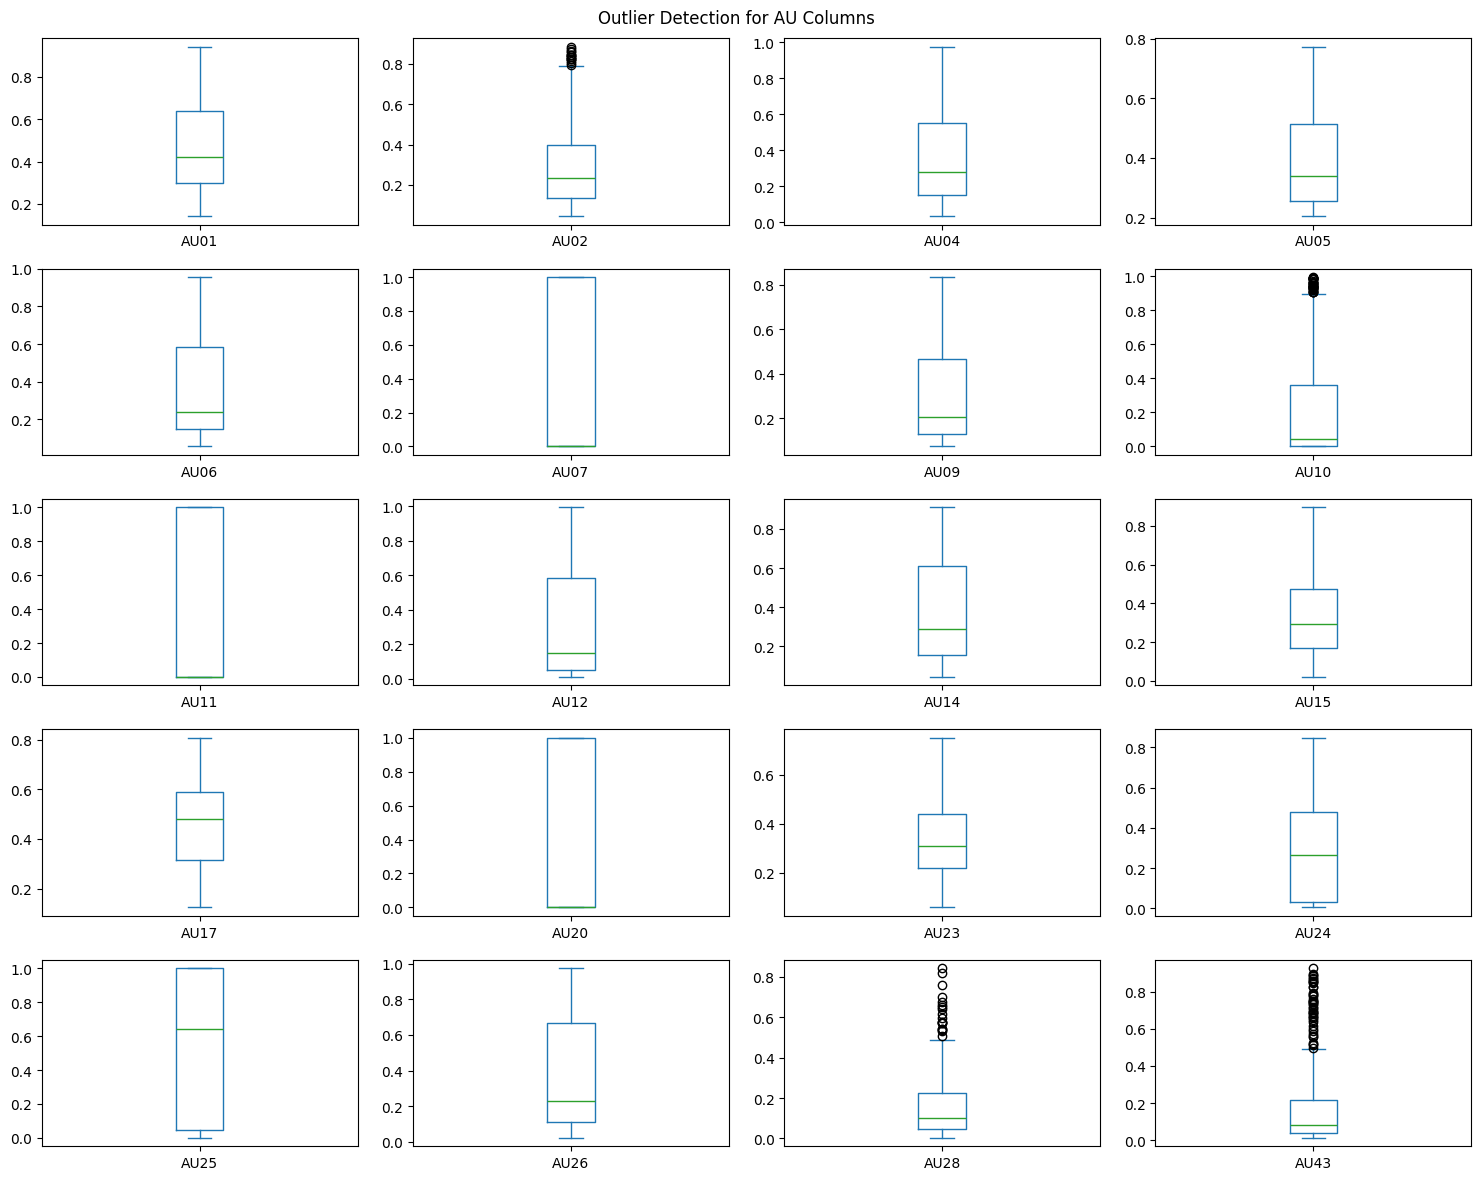

In [36]:
au_columns = ['AU01', 'AU02', 'AU04', 'AU05', 'AU06', 'AU07', 'AU09', 'AU10',
              'AU11', 'AU12', 'AU14', 'AU15', 'AU17', 'AU20', 'AU23', 'AU24',
              'AU25', 'AU26', 'AU28', 'AU43']

plt.figure(figsize=(20, 10))

data[au_columns].plot(kind='box', subplots=True, layout=(5, 4), figsize=(15, 12),
                    sharex=False, sharey=False, title='Outlier Detection for AU Columns')

plt.tight_layout()
plt.show()

In [37]:
df = data.drop(columns=['image_path'])

## Models & Metrics

In [38]:
x = df.drop(columns = ['emotion_class'])
y = df['emotion_class']

In [39]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

### *Basic Multinomial Logistic Model*

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


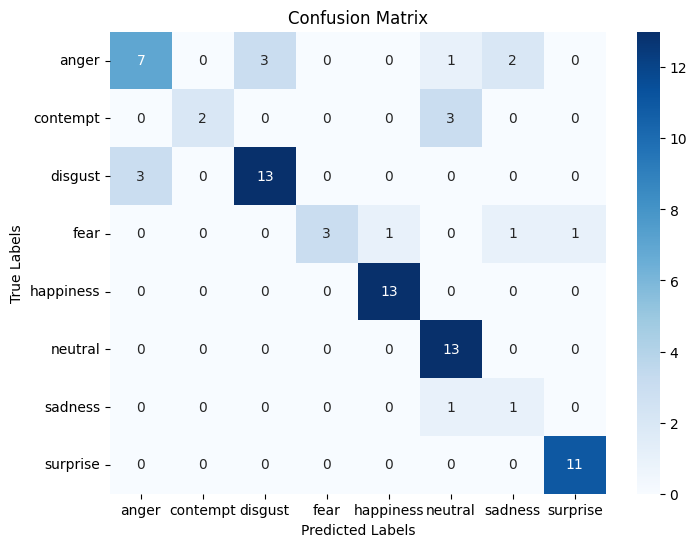

Accuracy: 79.75%

Classification Report:
               precision    recall  f1-score   support

       anger       0.70      0.54      0.61        13
    contempt       1.00      0.40      0.57         5
     disgust       0.81      0.81      0.81        16
        fear       1.00      0.50      0.67         6
   happiness       0.93      1.00      0.96        13
     neutral       0.72      1.00      0.84        13
     sadness       0.25      0.50      0.33         2
    surprise       0.92      1.00      0.96        11

    accuracy                           0.80        79
   macro avg       0.79      0.72      0.72        79
weighted avg       0.82      0.80      0.79        79



In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=500)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

print(f"Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:\n", report)

### *Modified Multinomial Logistic Model*

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


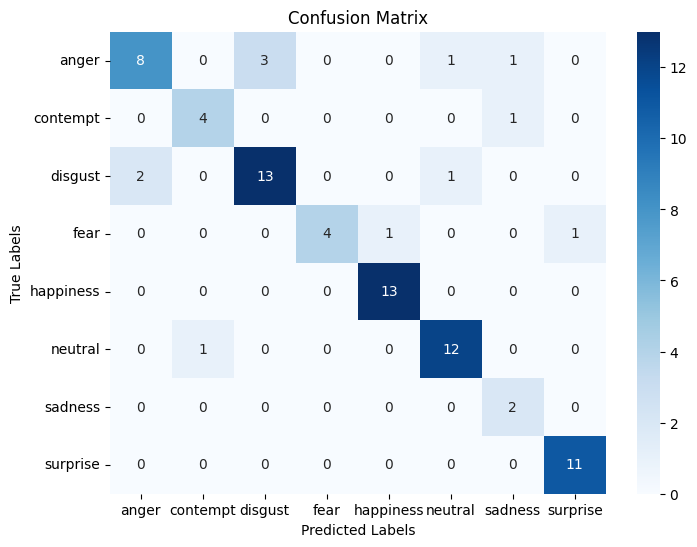

Best Parameters: {'logreg__C': 10, 'logreg__solver': 'lbfgs'}
Accuracy: 84.81%

Classification Report:
               precision    recall  f1-score   support

       anger       0.80      0.62      0.70        13
    contempt       0.80      0.80      0.80         5
     disgust       0.81      0.81      0.81        16
        fear       1.00      0.67      0.80         6
   happiness       0.93      1.00      0.96        13
     neutral       0.86      0.92      0.89        13
     sadness       0.50      1.00      0.67         2
    surprise       0.92      1.00      0.96        11

    accuracy                           0.85        79
   macro avg       0.83      0.85      0.82        79
weighted avg       0.86      0.85      0.85        79



In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(multi_class='multinomial', max_iter=1000))
])

param_grid = {
    'logreg__C': [0.01, 0.1, 0.2, 1,9, 10,11, 100],
    'logreg__solver': ['newton-cg', 'lbfgs', 'sag', 'saga']
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(x_train, y_train)

best_model = grid_search.best_estimator_

y_pred = best_model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

print(f"Best Parameters: {grid_search.best_params_}")
print(f"Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:\n", report)

### *KNN model*

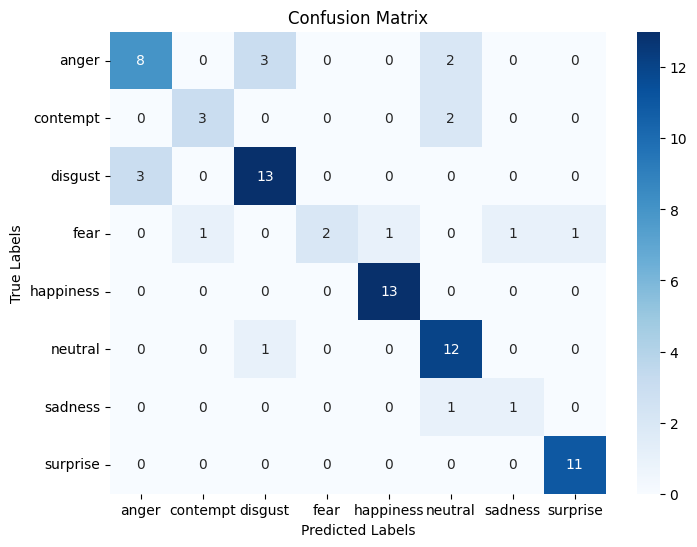

Accuracy: 79.75%

Classification Report:
               precision    recall  f1-score   support

       anger       0.73      0.62      0.67        13
    contempt       0.75      0.60      0.67         5
     disgust       0.76      0.81      0.79        16
        fear       1.00      0.33      0.50         6
   happiness       0.93      1.00      0.96        13
     neutral       0.71      0.92      0.80        13
     sadness       0.50      0.50      0.50         2
    surprise       0.92      1.00      0.96        11

    accuracy                           0.80        79
   macro avg       0.79      0.72      0.73        79
weighted avg       0.81      0.80      0.79        79



In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


model = KNeighborsClassifier(n_neighbors=6)

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

print(f"Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:\n", report)

In [32]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

for n_neighbors in range(1, 15):
  model = KNeighborsClassifier(n_neighbors=n_neighbors)
  model.fit(x_train, y_train)
  y_pred = model.predict(x_test)
  accuracy = accuracy_score(y_test, y_pred)
  print(f"Accuracy for n_neighbors={n_neighbors}: {accuracy * 100:.2f}%")

Accuracy for n_neighbors=1: 77.22%
Accuracy for n_neighbors=2: 74.68%
Accuracy for n_neighbors=3: 75.95%
Accuracy for n_neighbors=4: 78.48%
Accuracy for n_neighbors=5: 78.48%
Accuracy for n_neighbors=6: 79.75%
Accuracy for n_neighbors=7: 70.89%
Accuracy for n_neighbors=8: 75.95%
Accuracy for n_neighbors=9: 72.15%
Accuracy for n_neighbors=10: 75.95%
Accuracy for n_neighbors=11: 73.42%
Accuracy for n_neighbors=12: 74.68%
Accuracy for n_neighbors=13: 74.68%
Accuracy for n_neighbors=14: 74.68%


### *Modified KNN model*

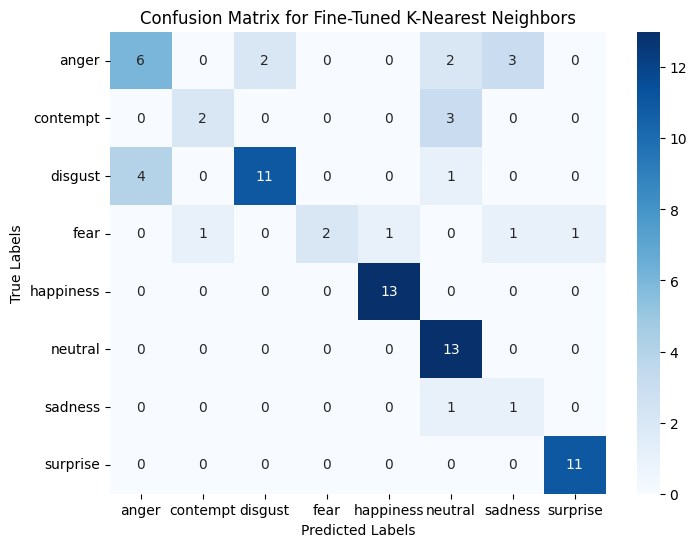

Best Parameters: {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'uniform'}
Accuracy: 74.68%

Classification Report:
               precision    recall  f1-score   support

       anger       0.60      0.46      0.52        13
    contempt       0.67      0.40      0.50         5
     disgust       0.85      0.69      0.76        16
        fear       1.00      0.33      0.50         6
   happiness       0.93      1.00      0.96        13
     neutral       0.65      1.00      0.79        13
     sadness       0.20      0.50      0.29         2
    surprise       0.92      1.00      0.96        11

    accuracy                           0.75        79
   macro avg       0.73      0.67      0.66        79
weighted avg       0.78      0.75      0.74        79



In [35]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

param_grid = {
    'n_neighbors': [3, 5, 6, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(x_train, y_train)

best_knn = grid_search.best_estimator_

y_pred = best_knn.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title("Confusion Matrix for Fine-Tuned K-Nearest Neighbors")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

print(f"Best Parameters: {grid_search.best_params_}")
print(f"Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:\n", report)


### *KNN Model Visulaization & PCA*

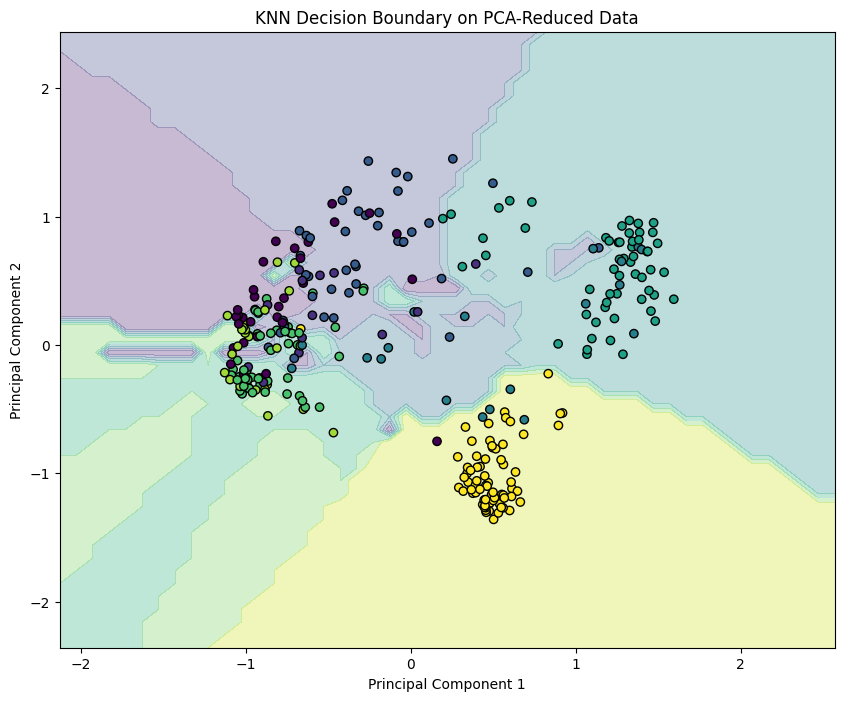

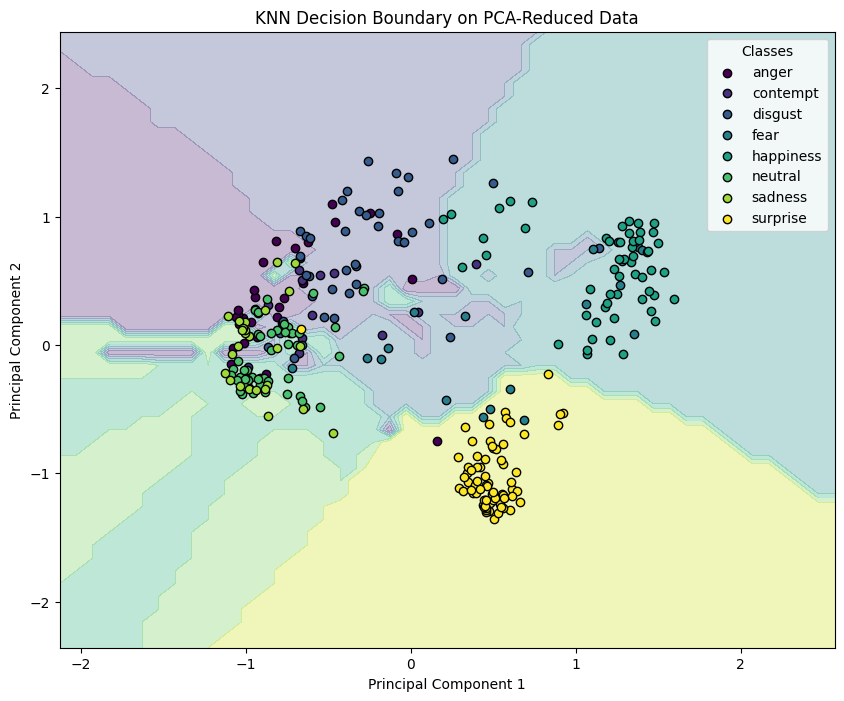

In [36]:
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder

pca = PCA(n_components=2)
x_train_2d = pca.fit_transform(x_train)
x_test_2d = pca.transform(x_test)

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x_train_2d, y_train)

x_min, x_max = x_train_2d[:, 0].min() - 1, x_train_2d[:, 0].max() + 1
y_min, y_max = x_train_2d[:, 1].min() - 1, x_train_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

Z = knn_model.predict(np.c_[xx.ravel(), yy.ravel()])

le = LabelEncoder()
Z = le.fit_transform(Z)
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')

y_train_numeric = le.transform(y_train)

scatter = plt.scatter(x_train_2d[:, 0], x_train_2d[:, 1], c=y_train_numeric, cmap='viridis', edgecolor='k')

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("KNN Decision Boundary on PCA-Reduced Data")

unique_labels = np.unique(y_train)
colors = plt.cm.viridis(np.linspace(0, 1, len(unique_labels)))

plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')

for i, label in enumerate(unique_labels):
    indices = np.where(y_train == label)
    plt.scatter(x_train_2d[indices, 0], x_train_2d[indices, 1],
                c=[colors[i]], label=label, edgecolor='k')

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("KNN Decision Boundary on PCA-Reduced Data")

plt.legend(title="Classes")

### *Decision Tree model*

Accuracy: 65.82%

Classification Report:
               precision    recall  f1-score   support

       anger       0.33      0.31      0.32        13
    contempt       0.67      0.40      0.50         5
     disgust       0.64      0.44      0.52        16
        fear       0.60      0.50      0.55         6
   happiness       0.93      1.00      0.96        13
     neutral       0.69      0.85      0.76        13
     sadness       0.33      1.00      0.50         2
    surprise       0.83      0.91      0.87        11

    accuracy                           0.66        79
   macro avg       0.63      0.68      0.62        79
weighted avg       0.66      0.66      0.65        79



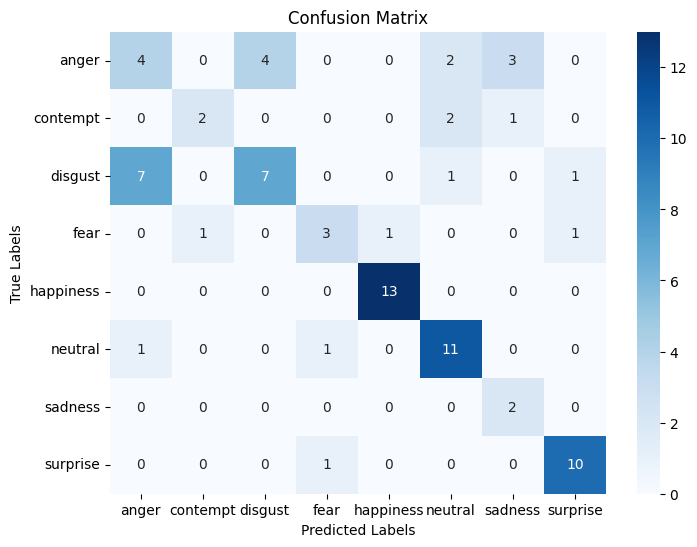

In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

model = DecisionTreeClassifier(random_state=42)

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:\n", report)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

### *Modified Decision Tree model*

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
50 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

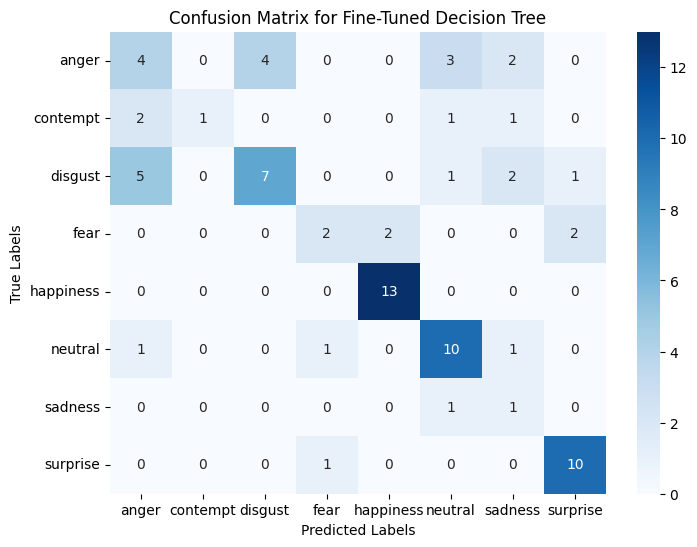

Best Parameters: {'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 3}
Accuracy: 60.76%

Classification Report:
               precision    recall  f1-score   support

       anger       0.33      0.31      0.32        13
    contempt       1.00      0.20      0.33         5
     disgust       0.64      0.44      0.52        16
        fear       0.50      0.33      0.40         6
   happiness       0.87      1.00      0.93        13
     neutral       0.62      0.77      0.69        13
     sadness       0.14      0.50      0.22         2
    surprise       0.77      0.91      0.83        11

    accuracy                           0.61        79
   macro avg       0.61      0.56      0.53        79
weighted avg       0.64      0.61      0.60        79



In [40]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [20],
    'min_samples_split': [1,2,3,4, 5, 10],
    'min_samples_leaf': [1, 2, 3,4,5]
}

grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(x_train, y_train)

best_model = grid_search.best_estimator_

y_pred = best_model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title("Confusion Matrix for Fine-Tuned Decision Tree")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

print(f"Best Parameters: {grid_search.best_params_}")
print(f"Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:\n", report)


### *Random Forest model*

Accuracy: 88.61%

Classification Report:
               precision    recall  f1-score   support

       anger       0.77      0.77      0.77        13
    contempt       1.00      0.40      0.57         5
     disgust       0.88      0.88      0.88        16
        fear       1.00      0.83      0.91         6
   happiness       0.93      1.00      0.96        13
     neutral       0.87      1.00      0.93        13
     sadness       0.67      1.00      0.80         2
    surprise       1.00      1.00      1.00        11

    accuracy                           0.89        79
   macro avg       0.89      0.86      0.85        79
weighted avg       0.89      0.89      0.88        79



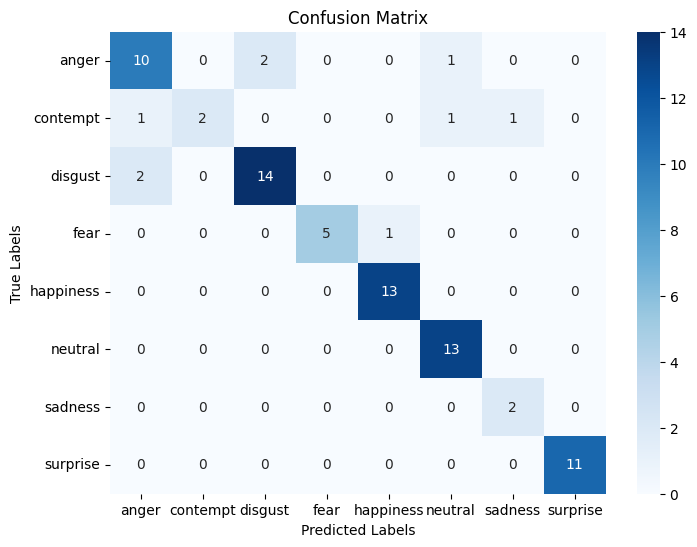

In [49]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
model = RandomForestClassifier(n_estimators=31, random_state=53)

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:\n", report)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

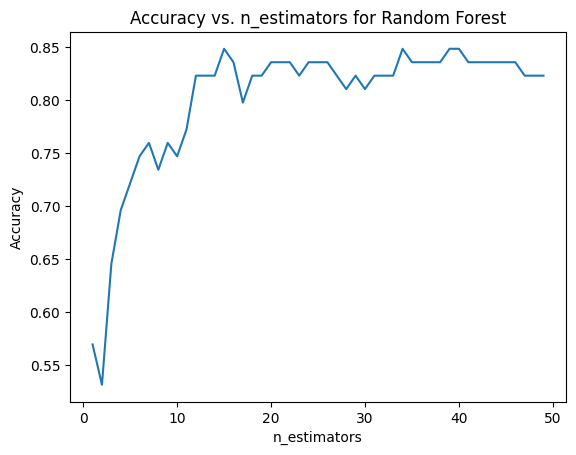

In [45]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

accuracies = []
n_estimators_values = range(1, 50)

for k in n_estimators_values:
    model = RandomForestClassifier(n_estimators=k, random_state=42)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

plt.plot(n_estimators_values, accuracies)
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.title("Accuracy vs. n_estimators for Random Forest")
plt.show()

In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

best_accuracy = 0
best_params = {'n_estimators': None, 'random_state': None}
accuracies = []

for n in range(1, 101):
    for rs in range(1, 100):
        model = RandomForestClassifier(n_estimators=n, random_state=rs)
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append((accuracy, n, rs))

        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_params['n_estimators'] = n
            best_params['random_state'] = rs

print("Best Accuracy:", best_accuracy)
print("Best Parameters:", best_params)


Best Accuracy: 0.8860759493670886
Best Parameters: {'n_estimators': 31, 'random_state': 53}


### *Modified Random Forest Model*

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
540 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
540 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/uti

{'anger': {'precision': 0.5384615384615384, 'recall': 0.4375, 'f1-score': 0.4827586206896552, 'support': 16.0}, 'contempt': {'precision': 1.0, 'recall': 0.5, 'f1-score': 0.6666666666666666, 'support': 6.0}, 'disgust': {'precision': 0.6666666666666666, 'recall': 0.6363636363636364, 'f1-score': 0.6511627906976745, 'support': 22.0}, 'fear': {'precision': 1.0, 'recall': 0.7142857142857143, 'f1-score': 0.8333333333333334, 'support': 7.0}, 'happiness': {'precision': 0.9047619047619048, 'recall': 1.0, 'f1-score': 0.95, 'support': 19.0}, 'neutral': {'precision': 0.8518518518518519, 'recall': 0.9583333333333334, 'f1-score': 0.9019607843137255, 'support': 24.0}, 'sadness': {'precision': 0.5714285714285714, 'recall': 0.8, 'f1-score': 0.6666666666666666, 'support': 5.0}, 'surprise': {'precision': 0.9047619047619048, 'recall': 1.0, 'f1-score': 0.95, 'support': 19.0}, 'accuracy': 0.7966101694915254, 'macro avg': {'precision': 0.8047415547415547, 'recall': 0.7558103354978356, 'f1-score': 0.7628186077

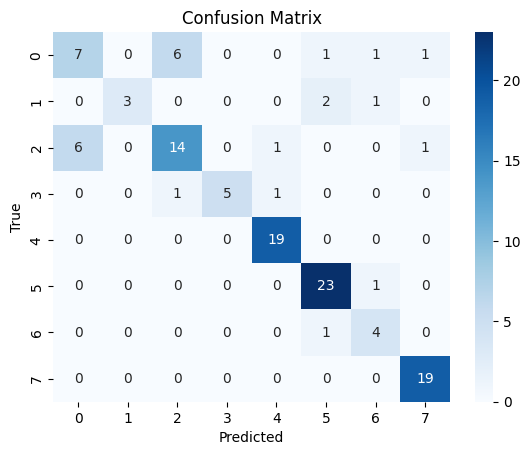

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, n_jobs=-1)
grid_search.fit(x_train, y_train)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)

report = classification_report(y_test, y_pred, output_dict=True)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy*100:.4f}')
print(report)

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
print(f'Accuracy: {accuracy*100:.4f}')

Accuracy: 65.2542


### *Gradient Boosting (e.g., XGBoost, LightGBM, CatBoost)*

####*XGboost*

XGBoost Accuracy: 80.50847457627118
              precision    recall  f1-score   support

       anger       0.60      0.56      0.58        16
    contempt       0.60      0.50      0.55         6
     disgust       0.88      0.68      0.77        22
        fear       1.00      0.86      0.92         7
   happiness       0.95      1.00      0.97        19
     neutral       0.78      0.88      0.82        24
     sadness       0.43      0.60      0.50         5
    surprise       0.90      1.00      0.95        19

    accuracy                           0.81       118
   macro avg       0.77      0.76      0.76       118
weighted avg       0.81      0.81      0.80       118



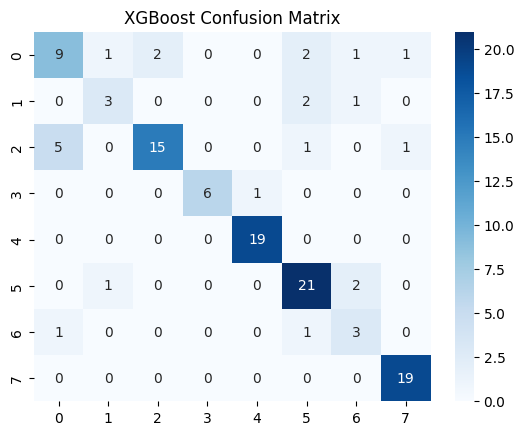

In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

y_train_encoded = le.fit_transform(y_train)

y_test_encoded = le.transform(y_test)

model_xgb = xgb.XGBClassifier()
model_xgb.fit(x_train, y_train_encoded)
y_pred_xgb = model_xgb.predict(x_test)

y_pred_original = le.inverse_transform(y_pred_xgb)

acc_xgb = accuracy_score(y_test_encoded, y_pred_xgb)
print("XGBoost Accuracy:", acc_xgb*100)
print(classification_report(y_test, y_pred_original))

cm_xgb = confusion_matrix(y_test_encoded, y_pred_xgb)
sns.heatmap(cm_xgb, annot=True, fmt="d", cmap="Blues")
plt.title("XGBoost Confusion Matrix")
plt.show()

#### *Modified XGboost Model*

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Tuned XGBoost Accuracy: 83.89830508474576
              precision    recall  f1-score   support

       anger       0.73      0.50      0.59        16
    contempt       0.75      0.50      0.60         6
     disgust       0.82      0.82      0.82        22
        fear       1.00      0.86      0.92         7
   happiness       0.90      1.00      0.95        19
     neutral       0.85      0.92      0.88        24
     sadness       0.50      0.80      0.62         5
    surprise       0.95      1.00      0.97        19

    accuracy                           0.84       118
   macro avg       0.81      0.80      0.79       118
weighted avg       0.84      0.84      0.83       118



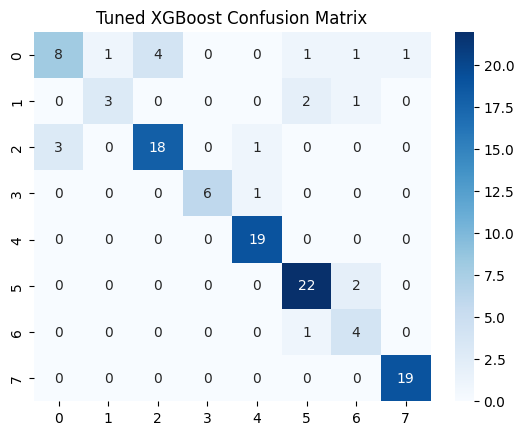

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200, 300],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

grid_search = GridSearchCV(estimator=xgb.XGBClassifier(), param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(x_train, y_train_encoded)

best_model = grid_search.best_estimator_
y_pred_tuned = best_model.predict(x_test)
y_pred_original_tuned = le.inverse_transform(y_pred_tuned)

acc_tuned = accuracy_score(y_test_encoded, y_pred_tuned)
print("Tuned XGBoost Accuracy:", acc_tuned * 100)
print(classification_report(y_test, y_pred_original_tuned))

cm_tuned = confusion_matrix(y_test_encoded, y_pred_tuned)
sns.heatmap(cm_tuned, annot=True, fmt="d", cmap="Blues")
plt.title("Tuned XGBoost Confusion Matrix")
plt.show()

#### *LightGBM*

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001444 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1570
[LightGBM] [Info] Number of data points in the train set: 275, number of used features: 20
[LightGBM] [Info] Start training from score -2.249475
[LightGBM] [Info] Start training from score -3.131864
[LightGBM] [Info] Start training from score -2.005853
[LightGBM] [Info] Start training from score -2.726399
[LightGBM] [Info] Start training from score -1.704748
[LightGBM] [Info] Start training from score -1.879101
[LightGBM] [Info] Start training from score -2.481277
[LightGBM] [Info] Start training from score -1.457888
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

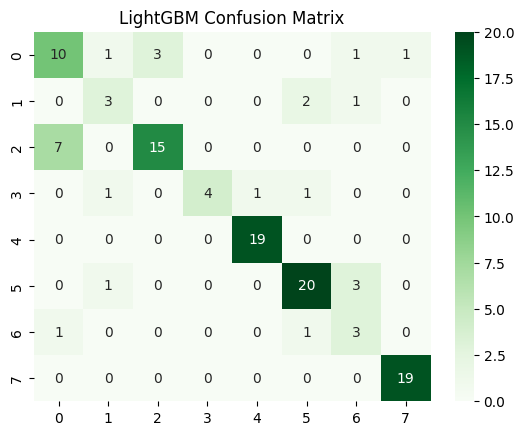

In [ ]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

model_lgb = lgb.LGBMClassifier()
model_lgb.fit(x_train, y_train)
y_pred_lgb = model_lgb.predict(x_test)

acc_lgb = accuracy_score(y_test, y_pred_lgb)
print("LightGBM Accuracy:", acc_lgb*100)
print(classification_report(y_test, y_pred_lgb))

cm_lgb = confusion_matrix(y_test, y_pred_lgb)
sns.heatmap(cm_lgb, annot=True, fmt="d", cmap="Greens")
plt.title("LightGBM Confusion Matrix")
plt.show()

#### *Catboost*

In [50]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 6.5 MB/s eta 0:00:00


CatBoost Accuracy: 84.81012658227847
              precision    recall  f1-score   support

       anger       0.73      0.62      0.67        13
    contempt       1.00      0.60      0.75         5
     disgust       0.81      0.81      0.81        16
        fear       1.00      0.83      0.91         6
   happiness       0.93      1.00      0.96        13
     neutral       0.81      1.00      0.90        13
     sadness       0.33      0.50      0.40         2
    surprise       1.00      1.00      1.00        11

    accuracy                           0.85        79
   macro avg       0.83      0.80      0.80        79
weighted avg       0.86      0.85      0.85        79



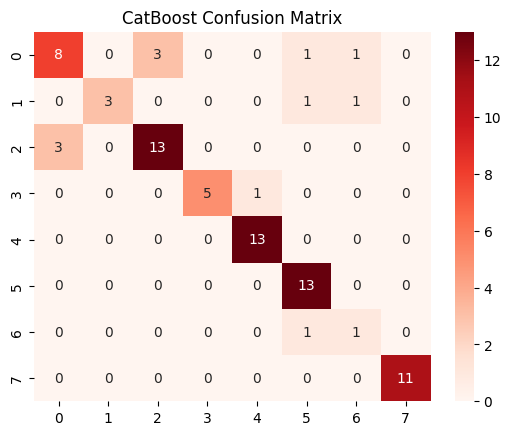

In [53]:
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

model_cat = CatBoostClassifier(verbose=0)
model_cat.fit(x_train, y_train)
y_pred_cat = model_cat.predict(x_test)

acc_cat = accuracy_score(y_test, y_pred_cat)
print("CatBoost Accuracy:", acc_cat*100)
print(classification_report(y_test, y_pred_cat))

cm_cat = confusion_matrix(y_test, y_pred_cat)
sns.heatmap(cm_cat, annot=True, fmt="d", cmap="Reds")
plt.title("CatBoost Confusion Matrix")
plt.show()

#### *Modified Catboost Model*

In [54]:
from catboost import CatBoostClassifier
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

param_grid = {
    'iterations': np.arange(100, 1001, 100),
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'depth': [4, 6, 8, 10],
    'l2_leaf_reg': [1, 3, 5, 7, 9]
}

model_cat = CatBoostClassifier(verbose=0)

random_search = RandomizedSearchCV(
    estimator=model_cat,
    param_distributions=param_grid,
    n_iter=20,
    scoring='accuracy',
    cv=3,
    random_state=42,
    n_jobs=-1
)

random_search.fit(x_train, y_train)

best_model_cat = random_search.best_estimator_
print("Best Parameters:", random_search.best_params_)

y_pred_cat = best_model_cat.predict(x_test)
acc_cat = accuracy_score(y_test, y_pred_cat)
print("Tuned CatBoost Accuracy:", acc_cat * 100)
print(classification_report(y_test, y_pred_cat))

cm_cat = confusion_matrix(y_test, y_pred_cat)
sns.heatmap(cm_cat, annot=True, fmt="d", cmap="Reds")
plt.title("Tuned CatBoost Confusion Matrix")
plt.show()


KeyboardInterrupt: 

### *Support Vector Machines (SVM) Model*


SVM Accuracy: 76.27118644067797
              precision    recall  f1-score   support

       anger       0.55      0.38      0.44        16
    contempt       1.00      0.17      0.29         6
     disgust       0.71      0.68      0.70        22
        fear       0.67      0.57      0.62         7
   happiness       0.90      1.00      0.95        19
     neutral       0.68      0.96      0.79        24
     sadness       0.60      0.60      0.60         5
    surprise       1.00      1.00      1.00        19

    accuracy                           0.76       118
   macro avg       0.76      0.67      0.67       118
weighted avg       0.77      0.76      0.74       118



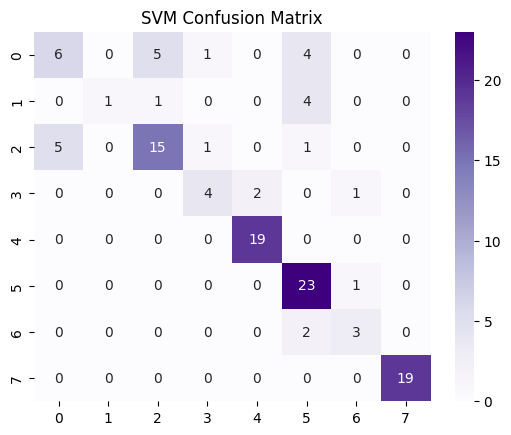

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

model_svm = SVC()
model_svm.fit(x_train, y_train)
y_pred_svm = model_svm.predict(x_test)

acc_svm = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy:", acc_svm * 100)
print(classification_report(y_test, y_pred_svm))

cm_svm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Purples")
plt.title("SVM Confusion Matrix")
plt.show()


### *Naive Bayes (GaussianNB) Model*


Naive Bayes Accuracy: 72.03389830508475
              precision    recall  f1-score   support

       anger       0.41      0.69      0.51        16
    contempt       0.33      0.17      0.22         6
     disgust       1.00      0.32      0.48        22
        fear       0.83      0.71      0.77         7
   happiness       0.95      1.00      0.97        19
     neutral       0.64      0.96      0.77        24
     sadness       0.00      0.00      0.00         5
    surprise       1.00      1.00      1.00        19

    accuracy                           0.72       118
   macro avg       0.65      0.61      0.59       118
weighted avg       0.75      0.72      0.69       118



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


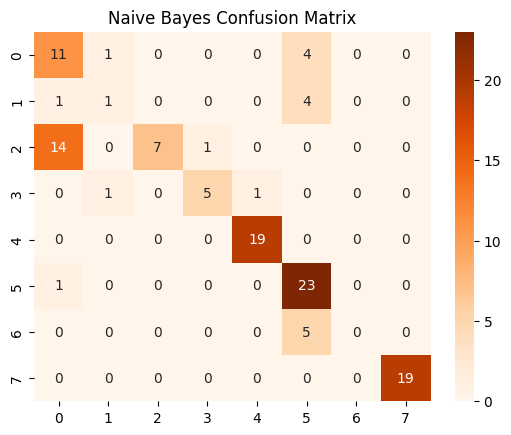

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

model_nb = GaussianNB()
model_nb.fit(x_train, y_train)
y_pred_nb = model_nb.predict(x_test)

acc_nb = accuracy_score(y_test, y_pred_nb)
print("Naive Bayes Accuracy:", acc_nb * 100)
print(classification_report(y_test, y_pred_nb))

cm_nb = confusion_matrix(y_test, y_pred_nb)
sns.heatmap(cm_nb, annot=True, fmt="d", cmap="Oranges")
plt.title("Naive Bayes Confusion Matrix")
plt.show()

### *Deep Learning Model*

In [ ]:
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y_encoded, test_size=0.2, random_state=42)

y_train_cat = tf.keras.utils.to_categorical(y_train)
y_test_cat = tf.keras.utils.to_categorical(y_test)

model = Sequential([
    Dense(64, activation='relu', input_shape=(x_train.shape[1],)),
    Dense(128, activation='relu'),

    Dense(len(label_encoder.classes_), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train_cat, epochs=45, validation_data=(x_test, y_test_cat), batch_size=16)

test_loss, test_accuracy = model.evaluate(x_test, y_test_cat)
print(f"Test Accuracy: {test_accuracy*100}")

Epoch 1/45


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - accuracy: 0.3431 - loss: 1.8688 - val_accuracy: 0.5570 - val_loss: 1.3582
Epoch 2/45
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.6766 - loss: 1.1538 - val_accuracy: 0.6962 - val_loss: 1.0183
Epoch 3/45
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7523 - loss: 0.8351 - val_accuracy: 0.7468 - val_loss: 0.7899
Epoch 4/45
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8136 - loss: 0.6585 - val_accuracy: 0.7848 - val_loss: 0.6776
Epoch 5/45
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8306 - loss: 0.6035 - val_accuracy: 0.7848 - val_loss: 0.6142
Epoch 6/45
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8591 - loss: 0.4552 - val_accuracy: 0.8354 - val_loss: 0.5352
Epoch 7/45
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8418 - loss: 0.4636 - val_accuracy: 0.8228 - val_loss: 0.5195
Epoch 8/45
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8804 - loss: 0.4175 - val_accuracy: 0.8228 - val_loss: 0.50

In [ ]:
model_filename = f"model_{test_accuracy}.keras"

model.save(model_filename)

print(f"Model saved as {model_filename}")

#### Visualization Of Accuracy Through Epochs

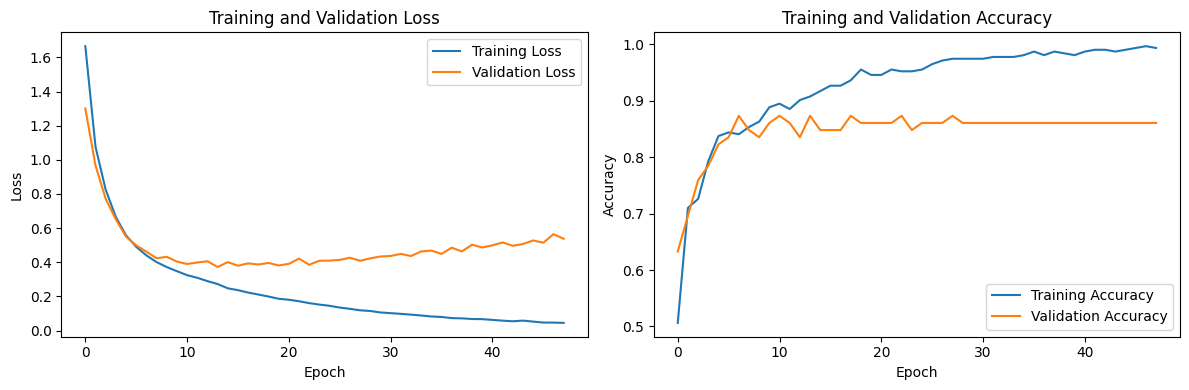

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.tight_layout()
plt.show()

#### Fine - Tuning The Model

In [ ]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.regularizers import l2

model = Sequential([
    Dense(64, activation='relu', kernel_regularizer=l2(0.01), input_shape=(x_train.shape[1],)),
    Dropout(0.5),
    Dense(128, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.5),
    Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
    Dense(len(label_encoder.classes_), activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_model.keras', save_best_only=True, monitor='val_loss')

history = model.fit(x_train, y_train_cat, epochs=50, validation_data=(x_test, y_test_cat), batch_size=16, callbacks=[checkpoint, early_stopping])

test_loss, test_accuracy = model.evaluate(x_test, y_test_cat)
print(f"Test Accuracy: {test_accuracy * 100}")


Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 66ms/step - accuracy: 0.1634 - loss: 4.0925 - val_accuracy: 0.5190 - val_loss: 3.5787
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.4154 - loss: 3.5385 - val_accuracy: 0.6709 - val_loss: 3.1724
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5172 - loss: 3.1689 - val_accuracy: 0.6582 - val_loss: 2.8417
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.6490 - loss: 2.7924 - val_accuracy: 0.6709 - val_loss: 2.5681
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6123 - loss: 2.6603 - val_accuracy: 0.6962 - val_loss: 2.3514
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6824 - loss: 2.4230 - val_accuracy: 0.7215 - val_loss: 2.1725
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.7334 - loss: 2.2289 - val_accuracy: 0.7342 - val_loss: 2.0586
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7576 - loss: 2.0423 - val_accuracy: 0.7595 - v

#### Visualization Of Accuracy Through Epochs

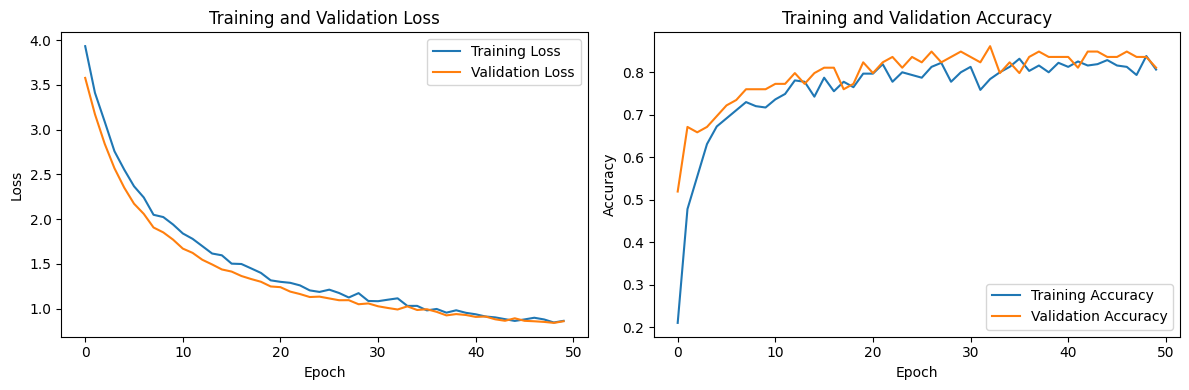

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.tight_layout()
plt.show()

## Comparison % Deduction of Best Model

## Random Forest is the best model here

Let's try to understand this model better.

In [51]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
model = RandomForestClassifier(n_estimators=31, random_state=53)

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 88.61%


### 1. Feature Importance Visualization
Random Forest models provide feature importance values that can be visualized to understand which features contribute most to the predictions.

<ipython-input-56-f81adede0802>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df.sort_values(by="Importance", ascending=False), x="Importance", y="Feature", palette="viridis")


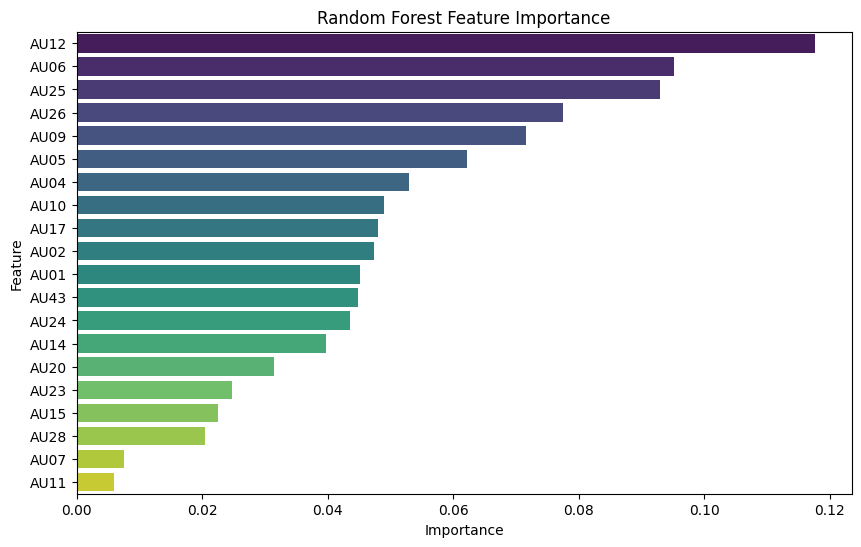

In [56]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=31, random_state=53)
model.fit(x_train, y_train)

feature_importance = model.feature_importances_
feature_names = x_train.columns if isinstance(x_train, pd.DataFrame) else [f"Feature {i}" for i in range(x_train.shape[1])]
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df.sort_values(by="Importance", ascending=False), x="Importance", y="Feature", palette="viridis")
plt.title("Random Forest Feature Importance")
plt.show()

###2. Visualizing Individual Decision Trees
You can visualize individual trees within the forest using the plot_tree function from sklearn.tree. Random forests are an ensemble of many trees, so it’s often best to visualize only a few trees to understand their structure.

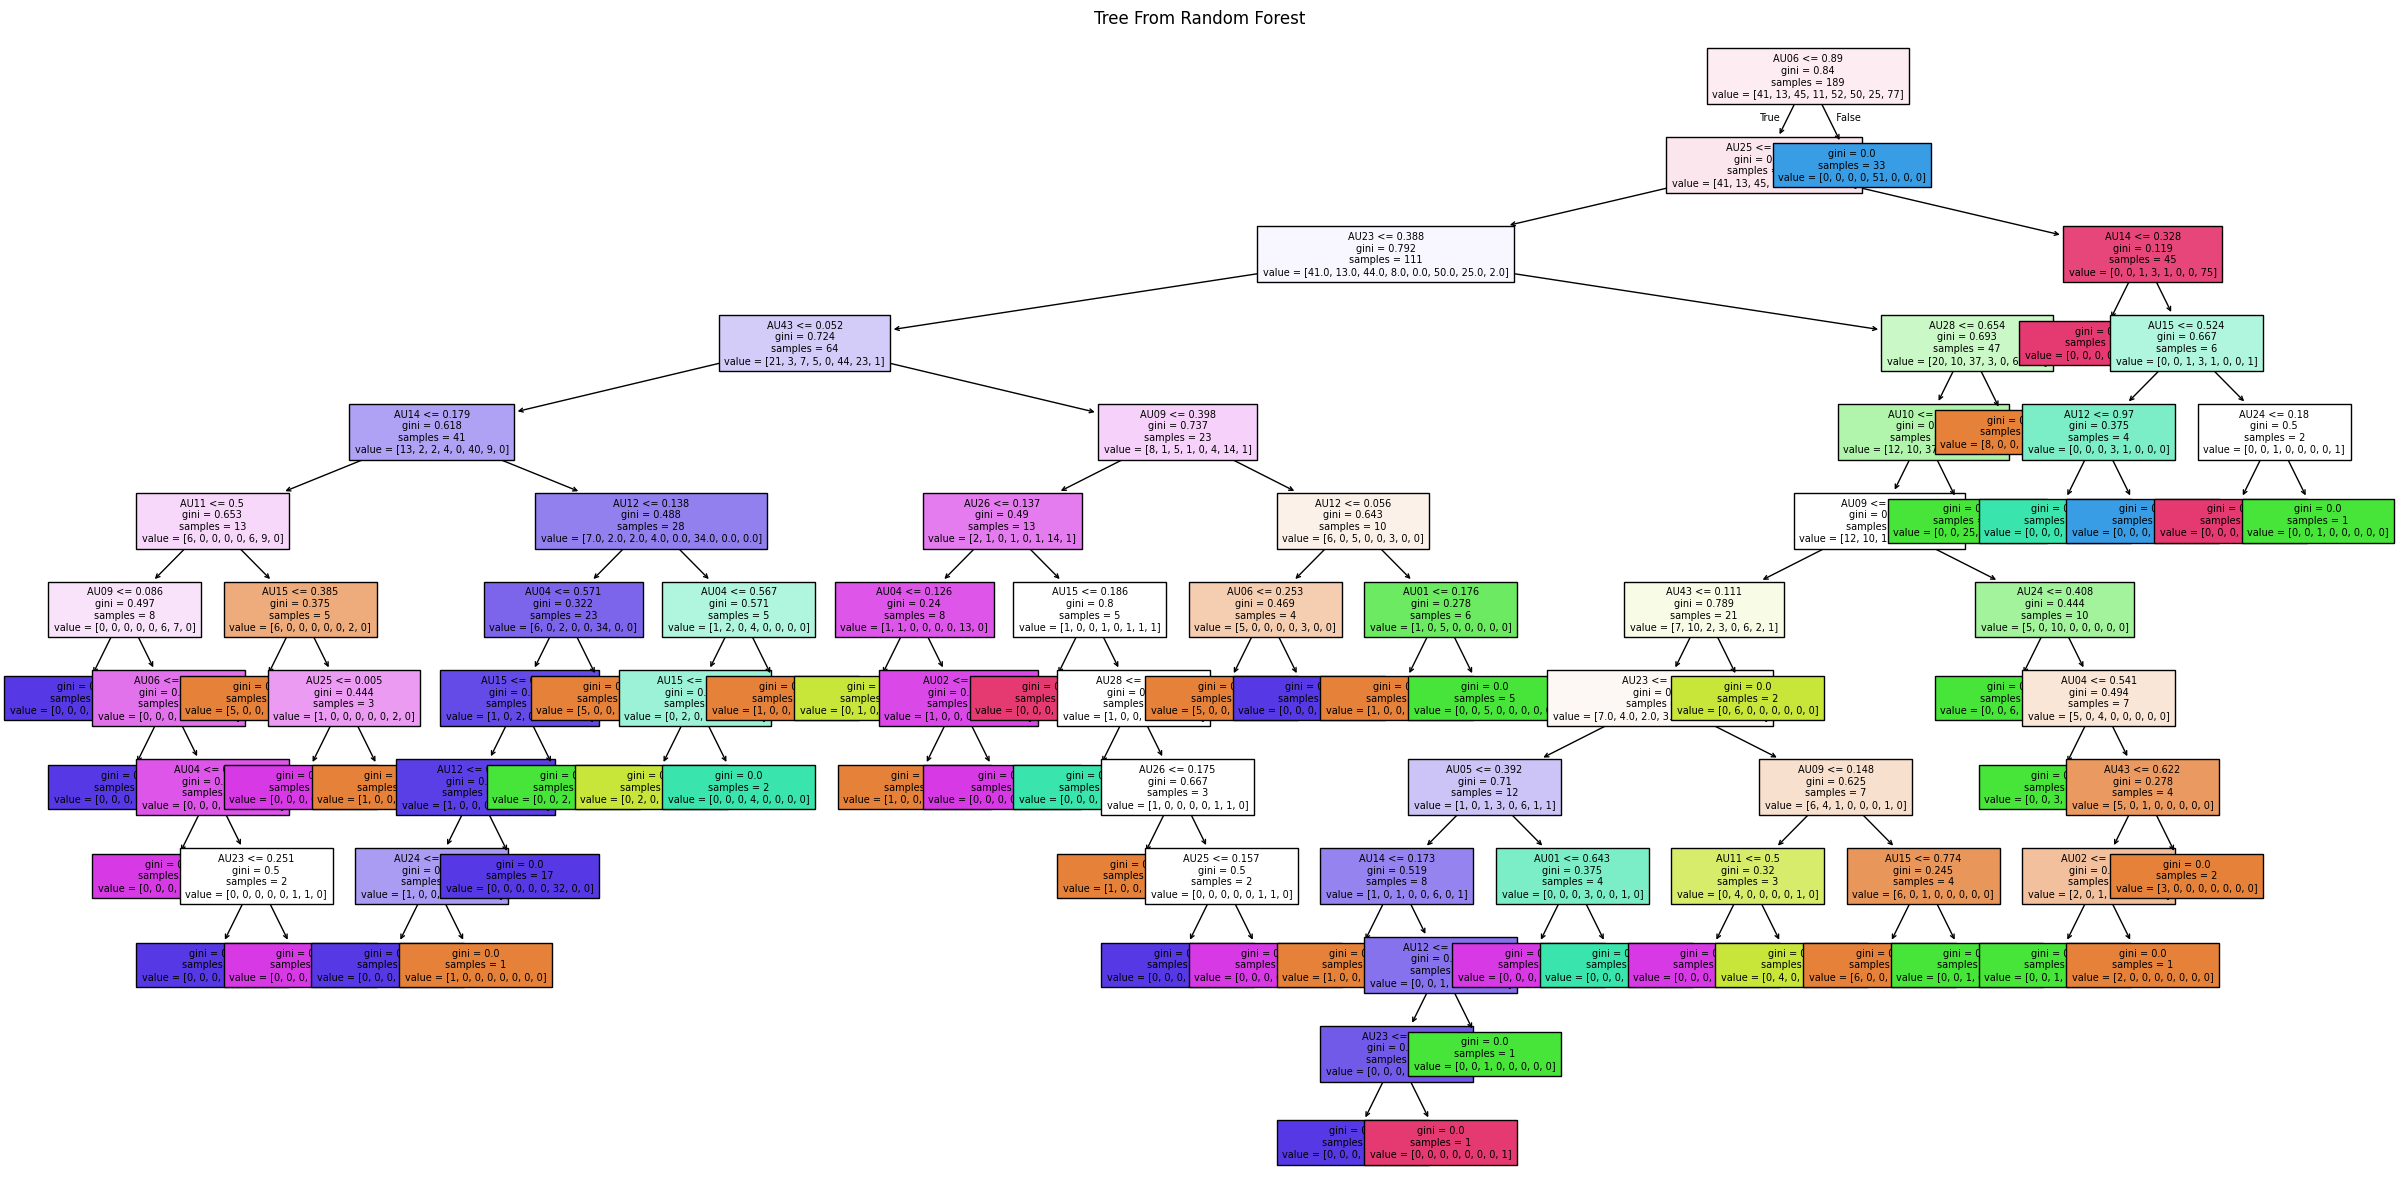

In [63]:
from sklearn.tree import plot_tree

plt.figure(figsize=(30, 15))
plot_tree(model.estimators_[0], feature_names=feature_names, filled=True, max_depth=15, fontsize=7)
plt.title("Tree From Random Forest")
plt.show()

###3. Partial Dependence Plots
Partial dependence plots show how the model's predictions change when a specific feature’s values change, holding other features constant. These are especially useful in Random Forest to understand feature relationships.

In [69]:
classes = model.classes_
print(classes)

target_class = classes[0]  # F

['anger' 'contempt' 'disgust' 'fear' 'happiness' 'neutral' 'sadness'
 'surprise']


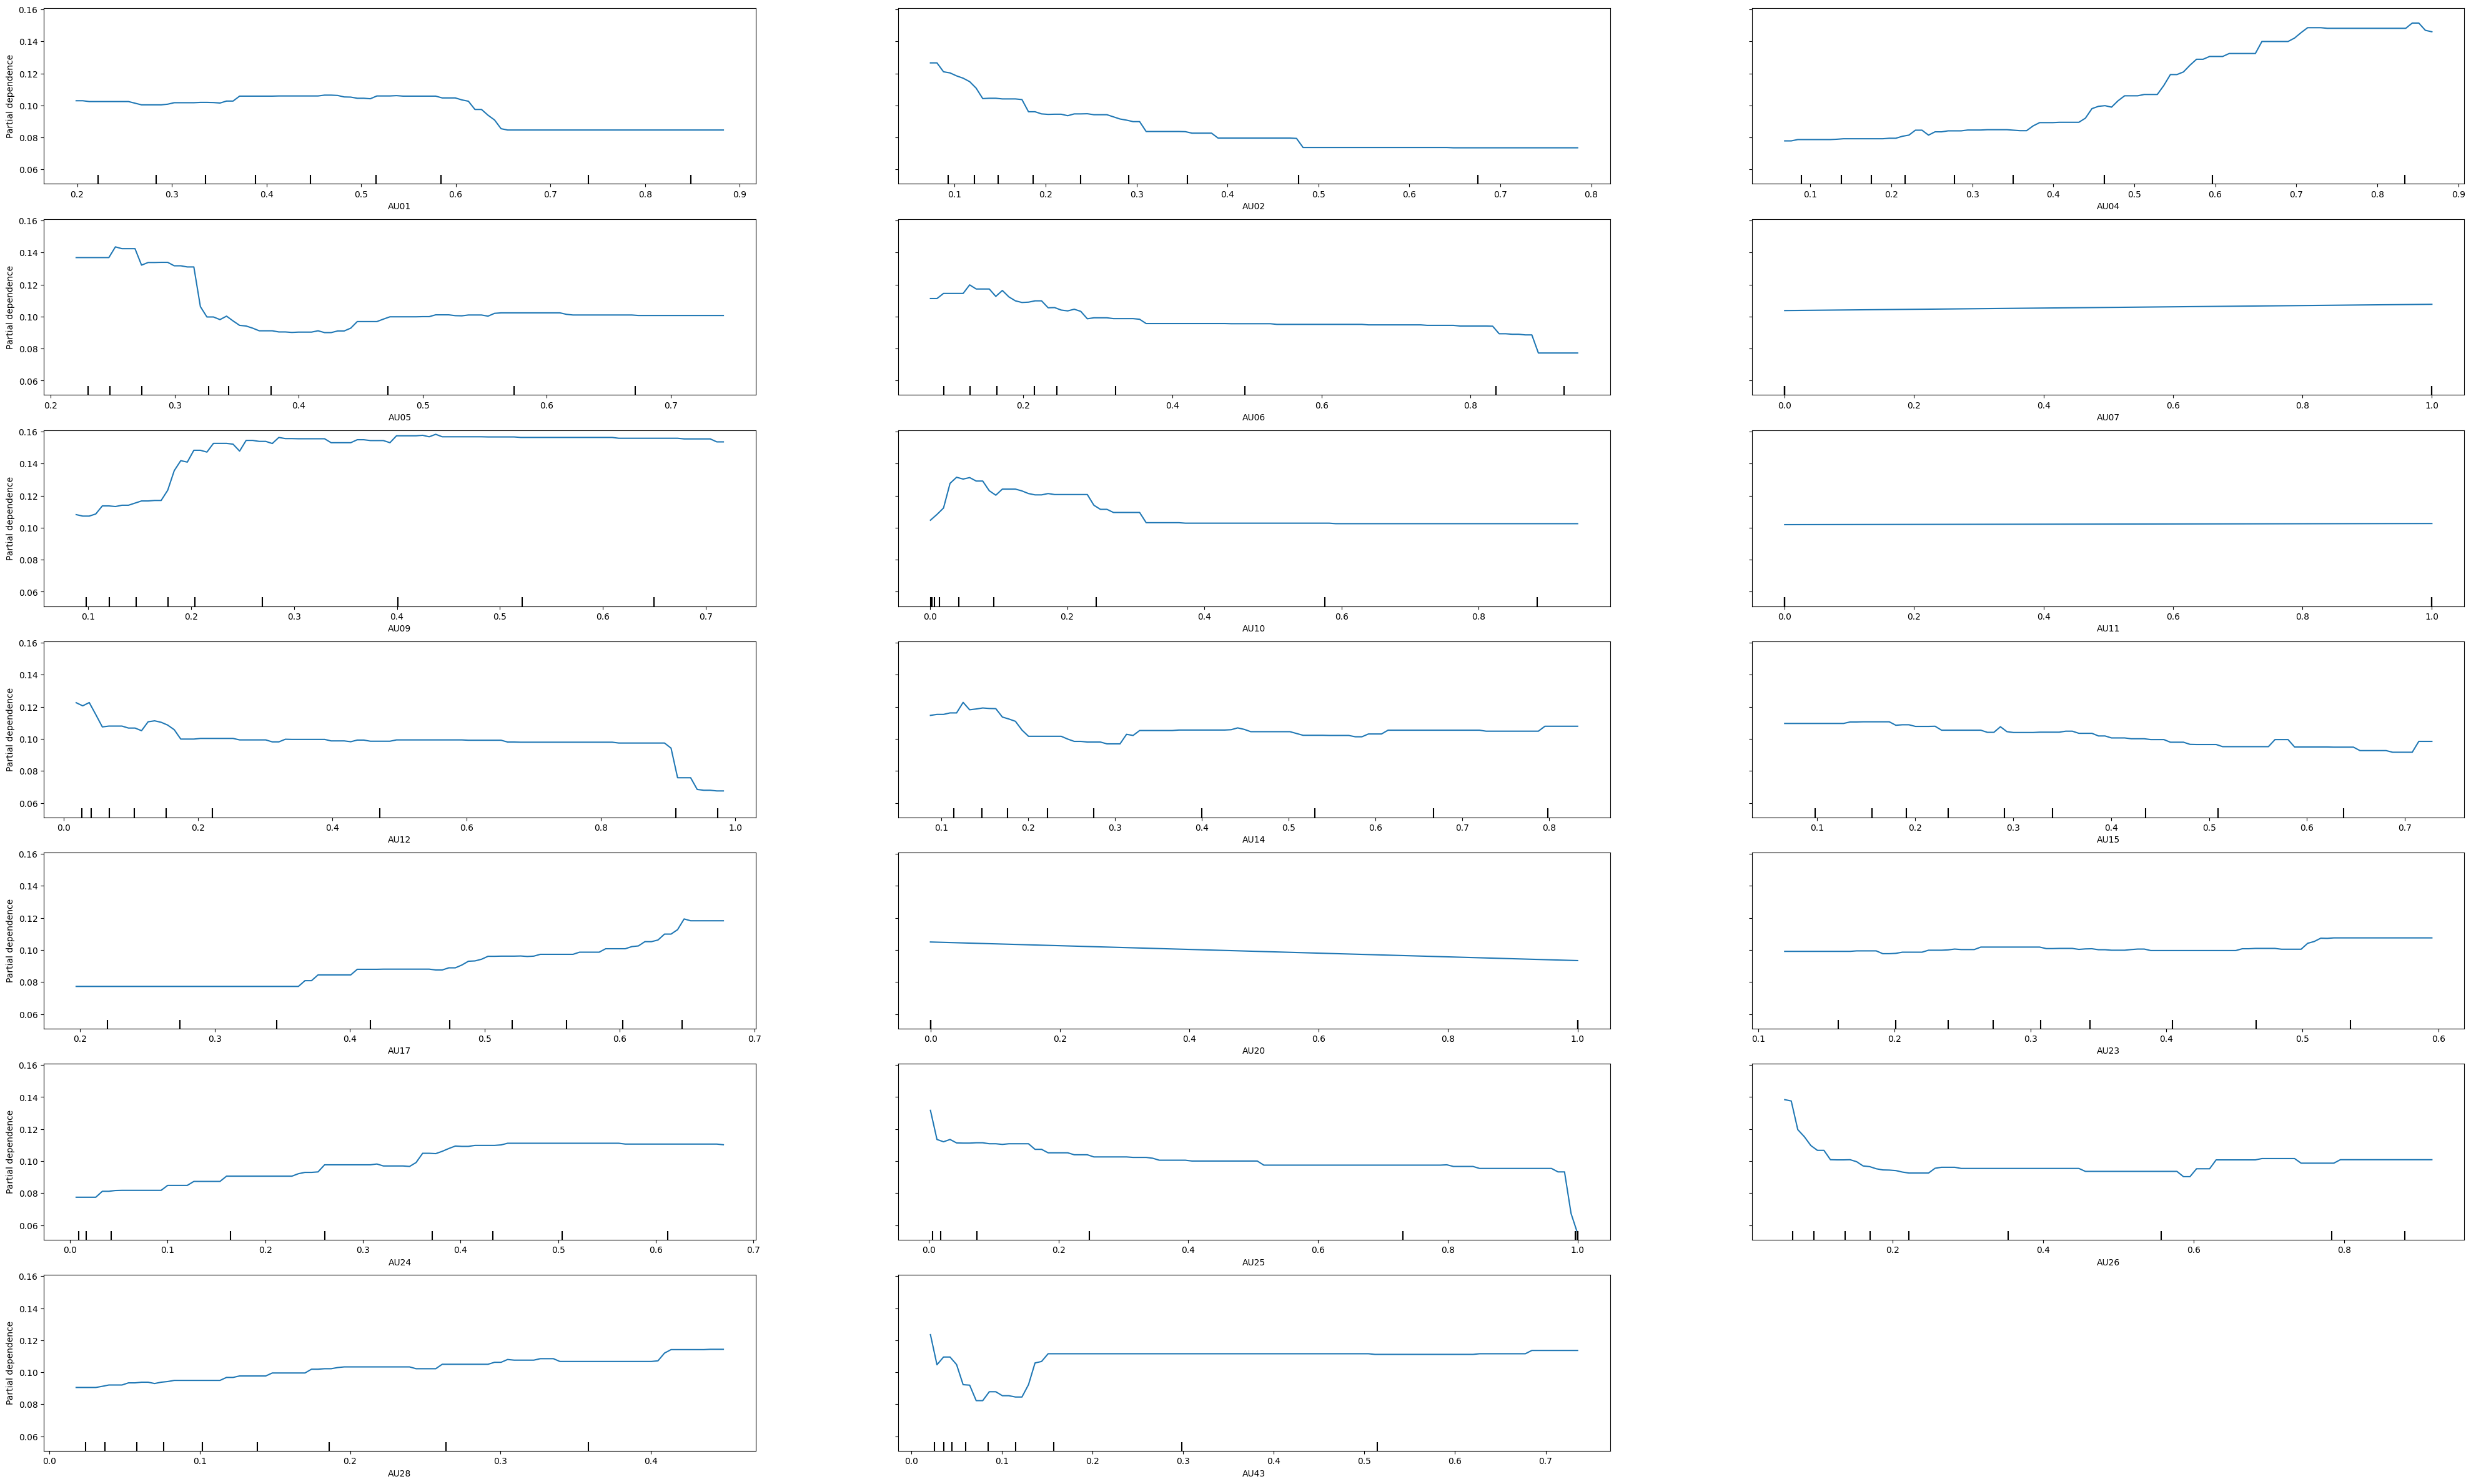

In [75]:
import matplotlib.pyplot as plt
from sklearn.inspection import partial_dependence
from sklearn.inspection import PartialDependenceDisplay

fig, ax = plt.subplots(figsize=(50, 30))
display = PartialDependenceDisplay.from_estimator(
    model,
    x_train,
    features=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19],
    feature_names=feature_names,
    ax=ax,
    target=target_class
)
plt.show()

###4. Learning Curves
Learning curves plot training and validation accuracy or loss as the model trains on increasingly larger portions of the dataset, helping assess bias vs. variance trade-offs.

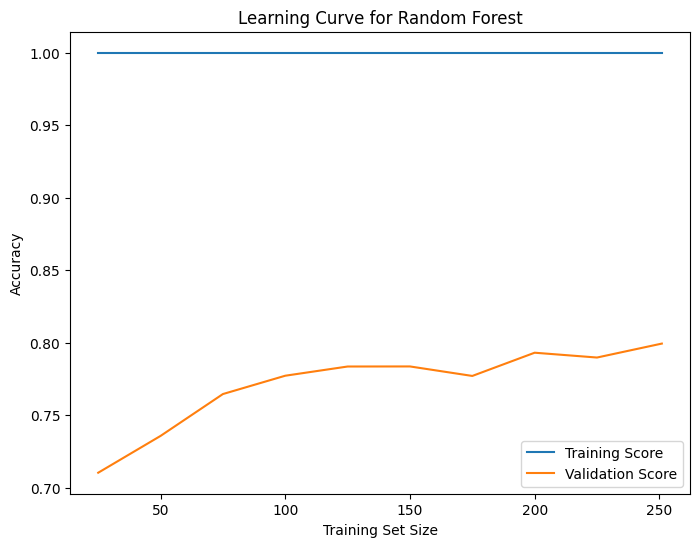

In [76]:
from sklearn.model_selection import learning_curve
import numpy as np

train_sizes, train_scores, test_scores = learning_curve(
    model, x_train, y_train, cv=5, scoring="accuracy", n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10)
)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores_mean, label="Training Score")
plt.plot(train_sizes, test_scores_mean, label="Validation Score")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.title("Learning Curve for Random Forest")
plt.legend(loc="best")
plt.show()

### 5. Permutation Importance
Permutation importance is another way to assess feature importance by randomly shuffling feature values and measuring the drop in accuracy. This technique helps identify the most influential features in the model.

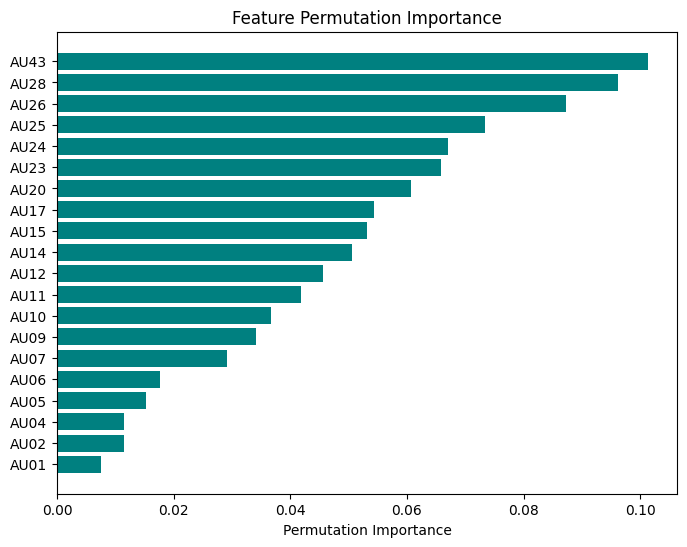

In [77]:
from sklearn.inspection import permutation_importance

perm_importance = permutation_importance(model, x_test, y_test, n_repeats=10, random_state=53)
sorted_idx = perm_importance.importances_mean.argsort()

plt.figure(figsize=(8, 6))
plt.barh(feature_names, perm_importance.importances_mean[sorted_idx], color="teal")
plt.xlabel("Permutation Importance")
plt.title("Feature Permutation Importance")
plt.show()

### 6. Confusion Matrix and Classification Report
Use the confusion matrix and classification report to visualize prediction performance across classes.

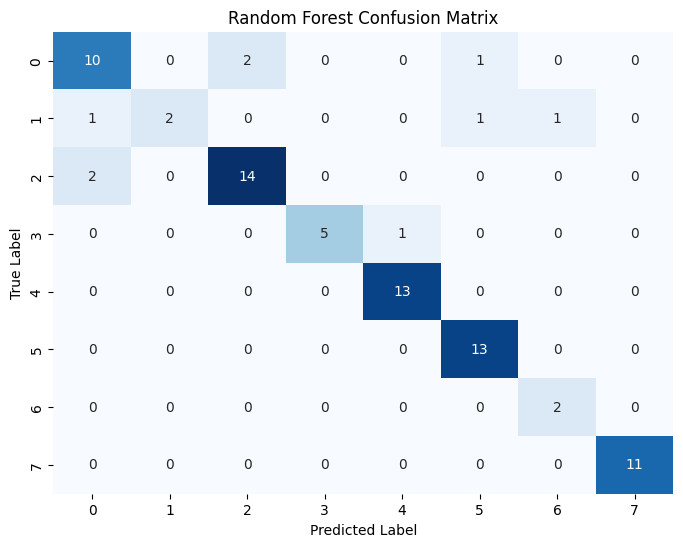

              precision    recall  f1-score   support

       anger       0.77      0.77      0.77        13
    contempt       1.00      0.40      0.57         5
     disgust       0.88      0.88      0.88        16
        fear       1.00      0.83      0.91         6
   happiness       0.93      1.00      0.96        13
     neutral       0.87      1.00      0.93        13
     sadness       0.67      1.00      0.80         2
    surprise       1.00      1.00      1.00        11

    accuracy                           0.89        79
   macro avg       0.89      0.86      0.85        79
weighted avg       0.89      0.89      0.88        79



In [78]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = model.predict(x_test)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", cbar=False)
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

print(classification_report(y_test, y_pred))

## User Input Evaluation

In [43]:
import cv2

def preprocess_image(image_path):

    image = cv2.imread(image_path)

    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    return image_rgb

In [44]:
from feat import Detector

def extract_aus(image_path):
    detector = Detector()
    results = detector.detect_image(image_path)
    aus = results.aus.iloc[0].values
    return aus

In [45]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

def predict_emotion(aus, model):
    aus_df = pd.DataFrame([aus], columns=x_train.columns)

    prediction = model.predict(aus_df)
    return prediction[0]

In [47]:
image = preprocess_image('/content/drive/MyDrive/Colab Notebooks/Shared 15 with main/SEM 7/PJT 1 /happiness/S026_006_00000013.png')

aus = extract_aus('/content/drive/MyDrive/Colab Notebooks/Shared 15 with main/SEM 7/PJT 1 /happiness/S026_006_00000013.png')

predicted_emotion = predict_emotion(aus, model)

/usr/local/lib/python3.10/dist-packages/feat/face_detectors/Retinaface/Retinaface_test.py:70: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  pretrained_dict = torch.load(
/us

Predicted Emotion: happiness


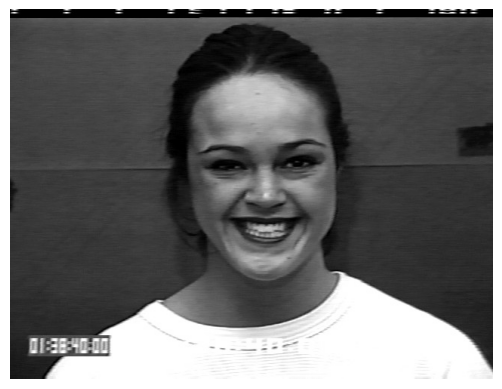

In [48]:
import matplotlib.pyplot as plt
import cv2

image_path = '/content/drive/MyDrive/Colab Notebooks/Shared 15 with main/SEM 7/PJT 1 /happiness/S026_006_00000013.png'

image = cv2.imread(image_path)

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image_rgb)
plt.axis('off')
plt.show()

In [50]:
print(f"Predicted Emotion: {predicted_emotion}")

Predicted Emotion: happiness
